# Making Plots With plotnine (aka ggplot)

## Instructor notes

*Estimated teaching time:* 40 min

*Estimated challenge time:* 50 min

*Key questions:*

  - " How can I visualize data in Python ?"
  - " What is 'grammar of graphics' ?"
    
*Learning objectives:*

  - "Familiarise yourself with The Grammar of Graphics through plotinine library"
  - "Create a ggplot object."
  - "Explore different geom objects"
  - "Explore other layers of ggplot, including themes and labels"

*Key points:*

  - "plotnine is python implementation of The Gramma of Graphics"
  - "ggplot is a set of gramma rules to make publication quality plots"
  - "ggplot has idea of layer, building a plot is just adding different layers together"

## Introduction

Python has a number of powerful plotting libraries to choose from. One of the oldest and most popular is [`matplotlib`](https://matplotlib.org/) - it forms the foundation for many other Python plotting libraries. For this exercise we are going to use [`plotnine`](https://plotnine.readthedocs.io/en/stable/) which is a Python implementation of the [The Grammar of Graphics](http://link.springer.com/book/10.1007%2F0-387-28695-0), inspired by the interface of the [`ggplot2`](http://ggplot2.org/) package from R. `plotnine` (and it's R cousin `ggplot2`) is a very nice way to create publication quality plots.

#### The Grammar of Graphics

> Statistical graphics is a mapping from data to aesthetic attributes (colour, shape, size) of geometric objects (points, lines, bars)

> Faceting can be used to generate the same plot for different subsets of the dataset

These are basic building blocks according to the grammar of graphics:

- **data** The data + a set of aesthetic mappings that describing variables mapping
- **geom** Geometric objects, represent what you actually see on the plot: points, lines, polygons, etc.
- **stats** Statistical transformations, summarise data in many useful ways.
- **scale** The scales map values in the data space to values in an aesthetic space
- **coord** A coordinate system, describes how data coordinates are mapped to the plane of the graphic.
- **facet** A faceting specification describes how to break up the data into subsets for plotting individual set

Let's explore these in detail.

First, install the `pandas` and `plotnine` packages to ensure they are available.

In [1]:
!pip install pandas plotnine

In [2]:
# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')

# Plotting in ggplot style

Let's set up our working environment with necessary libraries and also load our csv file into data frame called `survs_df`,

In [3]:
import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline
survs_df = pd.read_csv('surveys.csv').dropna()


To produce a plot with the `ggplot` class from `plotnine`, we must provide three things:

1. A data frame containing our data.
2. How the columns of the data frame can be translated into positions, colors, sizes, and shapes of graphical elements ("aesthetics").
3. The actual graphical elements to display ("geometric objects").



## Introduction to plotting



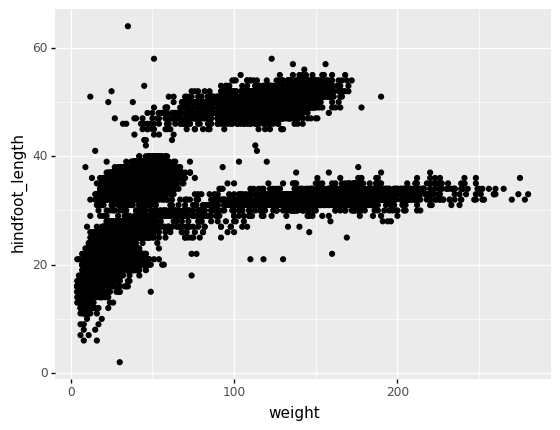

<ggplot: (8740548325349)>

In [4]:
ggplot(survs_df, aes(x='weight', y='hindfoot_length')) + geom_point()

Let's see if we can also include information about species and year.

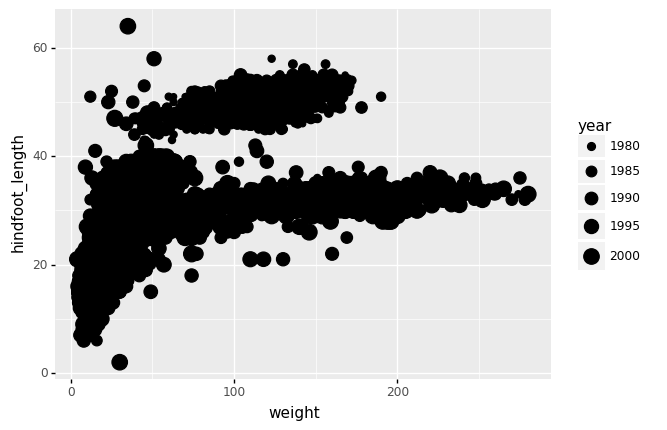

<ggplot: (8740539743809)>

In [5]:
ggplot(survs_df, aes(x='weight', y='hindfoot_length',
    size = 'year')) + geom_point()

Notice that we've dropped the `x=` and `y=` ? These are implied for the first and second argument of `aes()`.

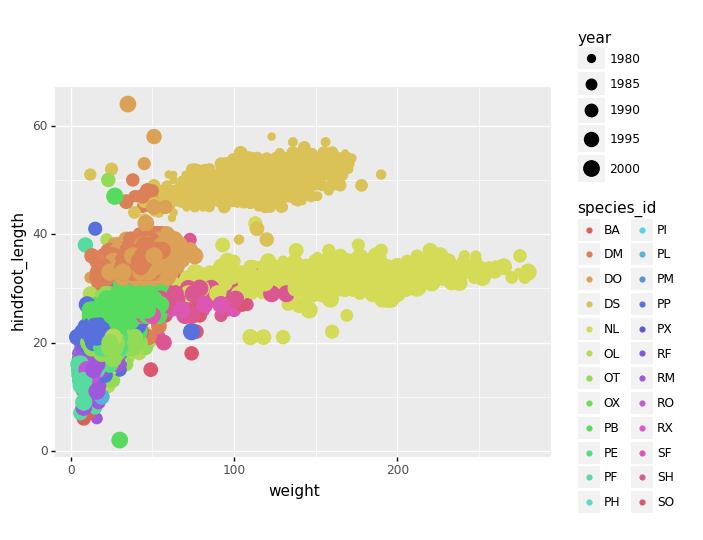

<ggplot: (8740539167985)>

In [6]:
ggplot(survs_df, aes(x='weight', y='hindfoot_length', 
    size = 'year', color = 'species_id')) + geom_point()


We can do simple counting plot, to see how many observation (data points) we have for each year for example



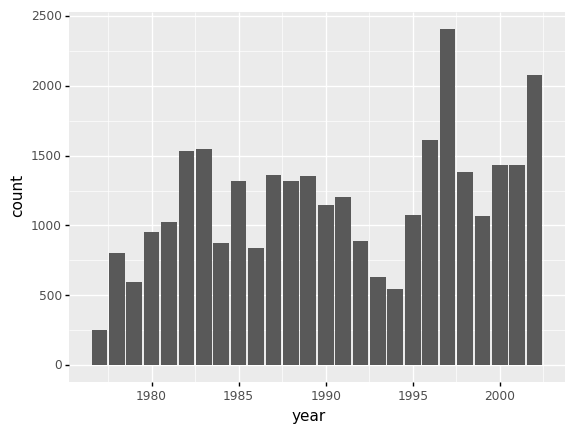

<ggplot: (8740539411246)>

In [7]:
ggplot(survs_df, aes(x='year')) + \
    geom_bar(stat = 'count')


Let's now also color by species to see how many observation we have per species in a given year



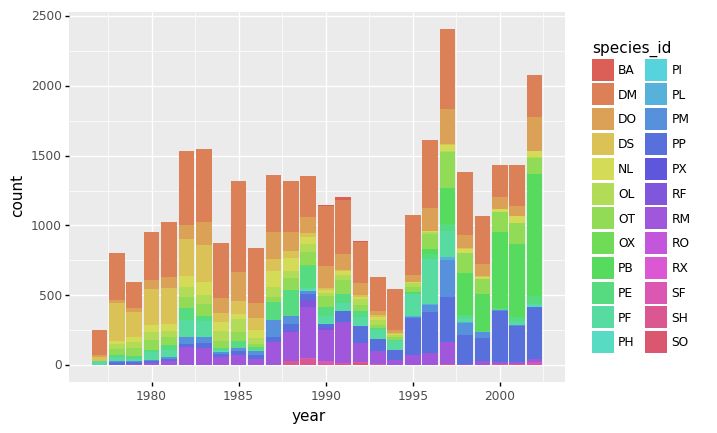

<ggplot: (8740539768442)>

In [8]:
ggplot(survs_df, aes(x='year', fill = 'species_id')) + \
    geom_bar(stat = 'count')

## Challenges

1. Produce a plot comparing the number of observations for each species at each site. The plot should have `site_id` on the x axis, ideally as categorical data. (HINT: You can convert a column in a DataFrame `df` to the 'category' type using: `df['some_col_name'] = df['some_col_name'].astype('category')`)

2. Create a **boxplot** of `hindfoot_length` across different species (`species_id` column) (HINT: There's a list of _geoms_ available for `plotnine` in the [docs](https://plotnine.readthedocs.io/en/stable/api.html#geoms) - instead of `geom_bar`, which one should you use ?)

## Solutions

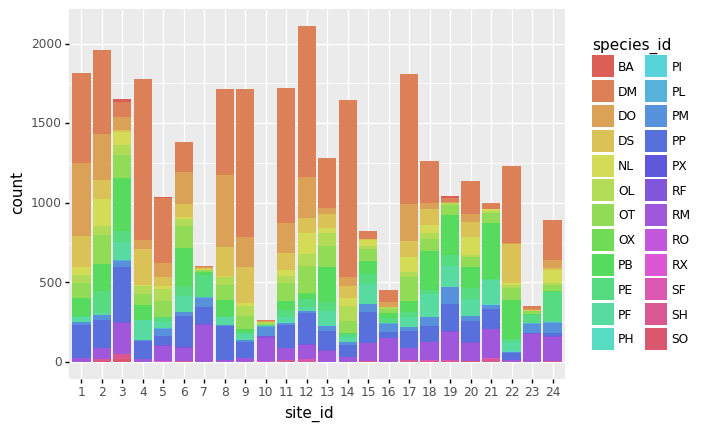

<ggplot: (8740538841070)>

In [9]:
# Part 1

# We convert site_id into a categorical column.
# This isn't strictly nessecary, but with categories we get all the x-axis labels 
# (with continuous we don't by default) - try both and see
survs_df['site_id'] = survs_df['site_id'].astype('category')

ggplot(survs_df, aes(x='site_id', fill = 'species_id')) \
    + geom_bar(stat='count')

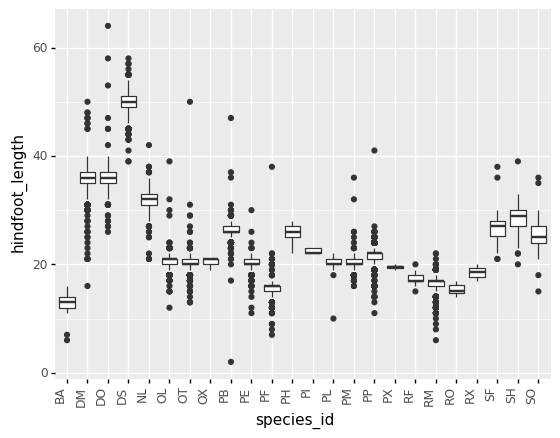

<ggplot: (8740548325061)>

In [10]:
# Part 2
ggplot(survs_df, aes(x='species_id', y='hindfoot_length')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(angle=90, hjust=1))

## More geom types



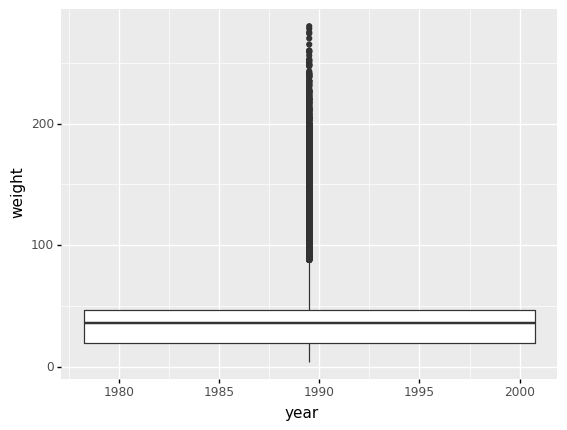

<ggplot: (8740536994720)>

In [11]:
ggplot(survs_df, aes(x='year', y='weight')) + \
    geom_boxplot()

Why are we not seeing mulitple boxplots, one for each year?
This is because year variable is continuous in our data frame, but for this purpose we want it to be categorical.

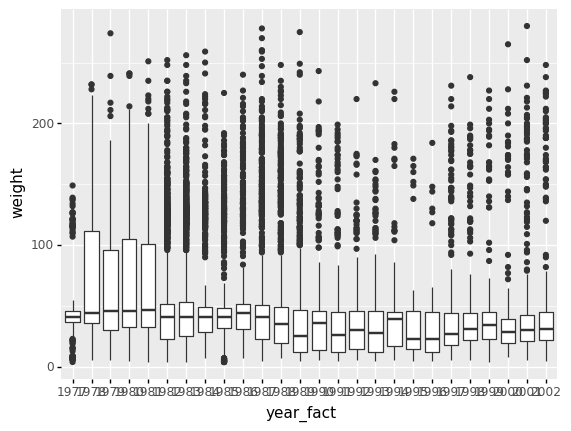

<ggplot: (8740536887501)>

In [12]:
survs_df['year_fact'] = survs_df['year'].astype("category")

ggplot(survs_df, aes(x='year_fact', y='weight')) + \
    geom_boxplot()

You'll notice the x-axis labels are overlapped. To flip them 90-degrees we can apply a `theme` so they look less cluttered. We will revisit themes later.

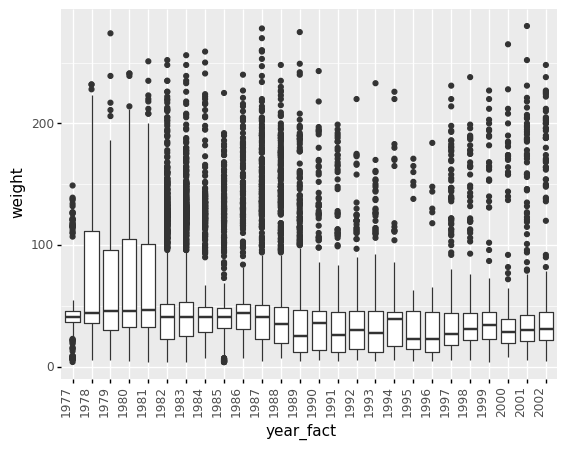

<ggplot: (8740536887426)>

In [13]:
ggplot(survs_df, aes(x='year_fact', y='weight')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(angle=90, hjust=1))

To save some typing, let's define this x-axis label rotating theme as a short variable name that we can reuse:

In [14]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1))

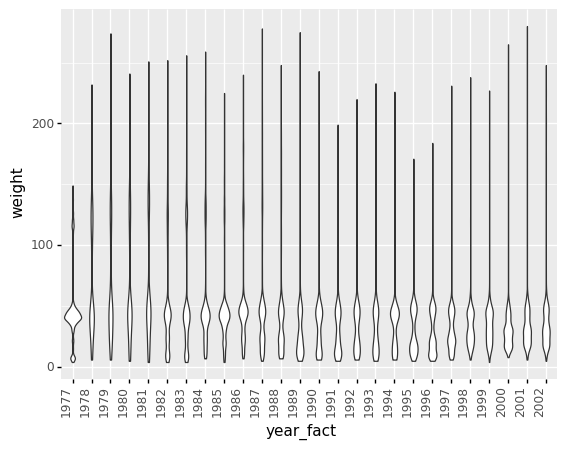

<ggplot: (8740548263639)>

In [15]:
ggplot(survs_df, aes(x='year_fact', y='weight')) + \
    geom_violin() + \
    flip_xlabels

To save an image for later:

In [16]:
plt1 = ggplot(survs_df, aes(x='year_fact', y='weight')) + \
           geom_boxplot() + \
           xlab("Years") + \
           ylab("Weight log2(kg)") + \
           ggtitle("Boxplots, summary of species weight in each year")

ggsave(filename="plot1.png",
       plot=plt1,
       device='png',
       dpi=300,
       height=25,
       width=25)

## Challenges

1. Can you log2 transform `weight` and plot a "normalised" boxplot ? Hint: use `np.log2()` function and name new column `weight_log`.

2. Does a log2 transform make this data visualisation better ?

## Solution

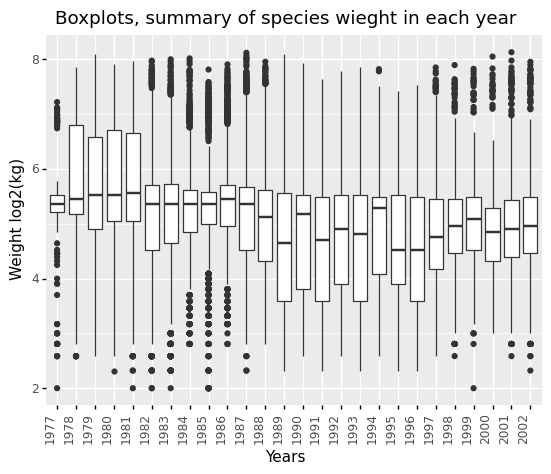

<ggplot: (8740539718867)>

In [17]:
survs_df['weight_log'] = np.log2(survs_df['weight'])
    
ggplot(survs_df, aes(x='year_fact', y='weight_log')) + \
    geom_boxplot() + \
    xlab("Years") + \
    ylab("Weight log2(kg)") + \
    ggtitle("Boxplots, summary of species wieght in each year") + \
    theme(axis_text_x = element_text(angle=90, hjust=1))

## Faceting

ggplot has a special technique called *faceting* that allows to split one plot
into multiple plots based on a factor included in the dataset. We will use it to
make one plot for a time series for each species.



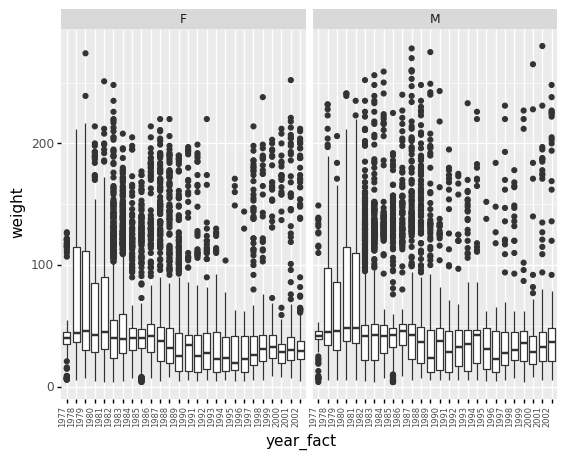

<ggplot: (8740539463254)>

In [18]:
ggplot(survs_df, aes(x='year_fact', y='weight')) + \
    geom_boxplot() + \
    facet_wrap(['sex']) + \
    flip_xlabels + \
    theme(axis_text_x = element_text(size=6))

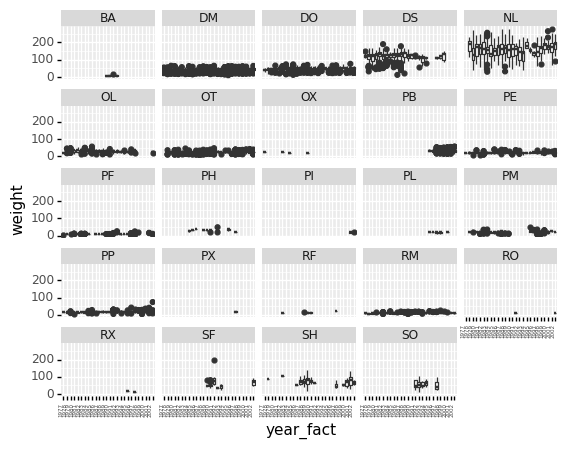

<ggplot: (8740539360142)>

In [19]:
ggplot(survs_df, aes(x='year_fact', y='weight')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(size=4)) + \
    facet_wrap(['species_id']) + \
    flip_xlabels

The two faceted plots above are probably easier to interpret using the `weight_log` column we created - give it a try !

## The "Layered Grammar of Graphics"

```erlang
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

## Theming

`plotnine` allows pre-defined 'themes' to be applied as aesthetics to the plot.

A list available theme you may want to experiment with is here: https://plotnine.readthedocs.io/en/stable/api.html#themes

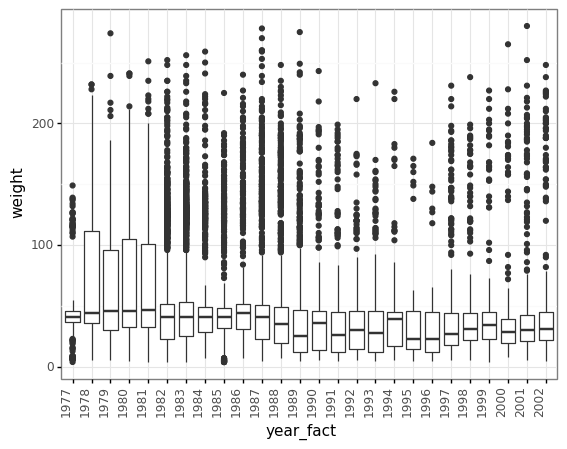

<ggplot: (8740535953198)>

In [20]:
ggplot(survs_df, aes(x='year_fact', y='weight')) + \
    geom_boxplot() + \
    theme_bw() + \
    flip_xlabels

findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


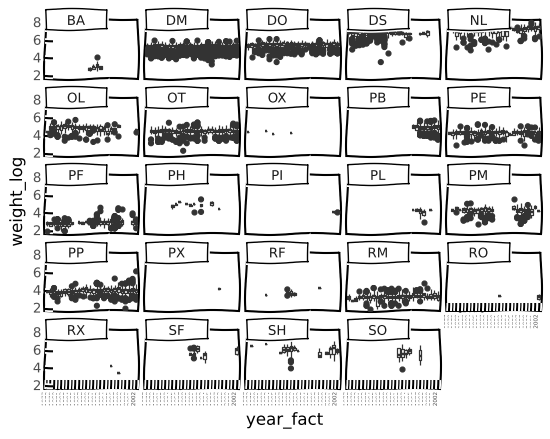

<ggplot: (8740535747831)>

In [21]:
ggplot(survs_df, aes(x='year_fact', y='weight_log')) + \
    geom_boxplot() + \
    facet_wrap(['species_id']) + \
    theme_xkcd() + \
    theme(axis_text_x = element_text(size=4, angle=90, hjust=1))

## Extra bits 1

Let's try to bin years into decades, which could be crude but might gives simple images to look at.



In [22]:
bins = [(survs_df['year'] < 1980),
        (survs_df['year'] < 1990),
        (survs_df['year'] < 2000),
        (survs_df['year'] >= 2000)]

labels = ['70s', '80s', '90s', 'Z']

survs_df['year_bins'] = np.select(bins, labels)

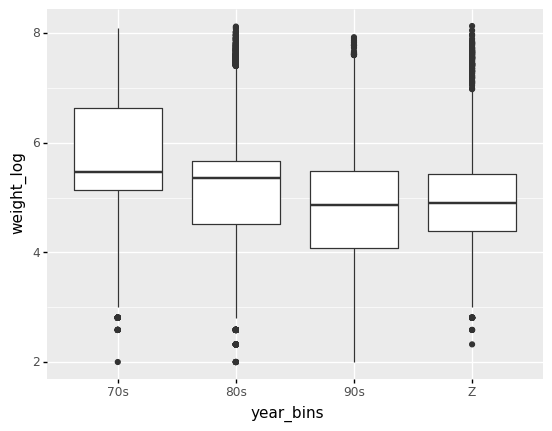

<ggplot: (8740539167904)>

In [23]:
plt2 = ggplot(survs_df, aes(x='year_bins', y='weight_log')) + \
           geom_boxplot()
plt2

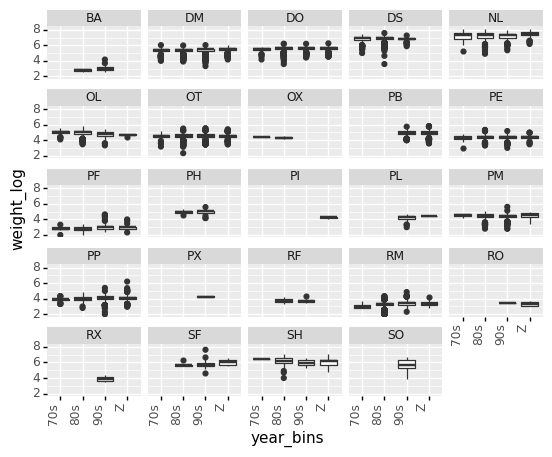

<ggplot: (8740536692839)>

In [24]:
plt2 = ggplot(survs_df, aes(x='year_bins', y='weight_log')) + \
           geom_boxplot() + \
           flip_xlabels + \
           facet_wrap(['species_id'])
plt2

## Extra bits 2

This is a different way to look at your data



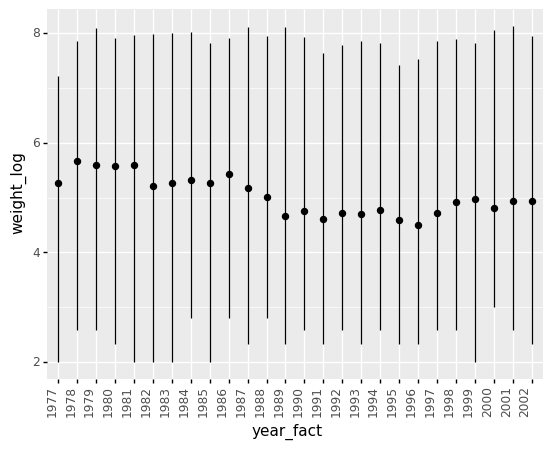

<ggplot: (8740535993939)>

In [25]:
ggplot(survs_df, aes("year_fact", "weight")) + \
    stat_summary(fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + \
    theme(axis_text_x = element_text(angle=90, hjust=1))
    
ggplot(survs_df, aes("year_fact", "weight")) + \
    stat_summary(fun_y = np.median, fun_ymin=np.min, fun_ymax=np.max) + \
    theme(axis_text_x = element_text(angle=90, hjust=1))
    
ggplot(survs_df, aes("year_fact", "weight_log")) + \
    stat_summary(fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + \
    theme(axis_text_x = element_text(angle=90, hjust=1))